In [2]:
import pandas as pd
import fastparquet

#### Observamos cómo está conformado el Dataset `1.json` de la carpeta metadata-sitios

In [14]:
df_1 = pd.read_json('../Datasets/Google/metadata-sitios/1.json', lines=True)
df_1.head(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [18]:
print(df_1.shape)
print(df_1.dtypes)

(275001, 15)
name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


Podemos ver que tiene datos importantes a primera vista como gmap_id que parece ser un identificador único el cual también se encuentra en el data set de reviews y podría ser usado para cruzar los de estos datasets.

Por otro lado tenemos la category podemos ver que la variedad de categorías es bastante amplia por lo que deberíamos ver de filtrar solo por la que nos interesa que son los restaurantes.

También tenemos el avg_rating que nos da una primera evaluación de los restaurantes bastante sólida y accesible.

Este dato se complementa bastante con el num_of_reviews tomando a priori como positivo un número alto de reviews.

## Filtrado por categoría para hacer un análisis más cercano de los datos que realmente nos interesan, que son los restaurantes

In [3]:
import sys
import os

# Agregar la carpeta raíz (un nivel arriba de EDA) a sys.path
root_path = os.path.abspath(os.path.join(".."))
if root_path not in sys.path:
    sys.path.append(root_path)

In [4]:
from clean_functions import clean_metadatos
input_directory = "../Datasets/Google/metadata-sitios"
output_path = "../Data_cleaned/metadatosgoogle/filtered_restaurants.parquet"

In [3]:
clean_metadatos.process_metadata_files(input_directory, output_path)

NameError: name 'clean_metadatos' is not defined

In [3]:
df_completo = pd.read_parquet('../Data_cleaned/metadatosgoogle/filtered_restaurants.parquet')

In [3]:
df_completo.head(3)

,gmap_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,761 S Vermont Ave,Los Angeles,CA,90005,34.058092,-118.292130,4.4,18,[Korean restaurant],"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],..."
1,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Vons Chicken,12740 La Mirada Blvd,La Mirada,CA,90638,33.916402,-118.010855,4.5,18,[Restaurant],"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM..."
2,0x87ec235c54d25b31:0x3b75fb5facc602f,"Sweet Rewards Gluten Free Bakery, LLC",85 NE Dartmoor Dr,Waukee,IA,50263,41.616079,-93.865487,4.7,21,"[Bakery, Health food restaurant]","[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM..."


Aquí ya tenemos la data filtrada por categoría restaurante y, además, se transformó la columna address de forma tal que sea más práctica de trabajar, creando, por ejemplo, una columna estado para poder hacer un análisis por estado

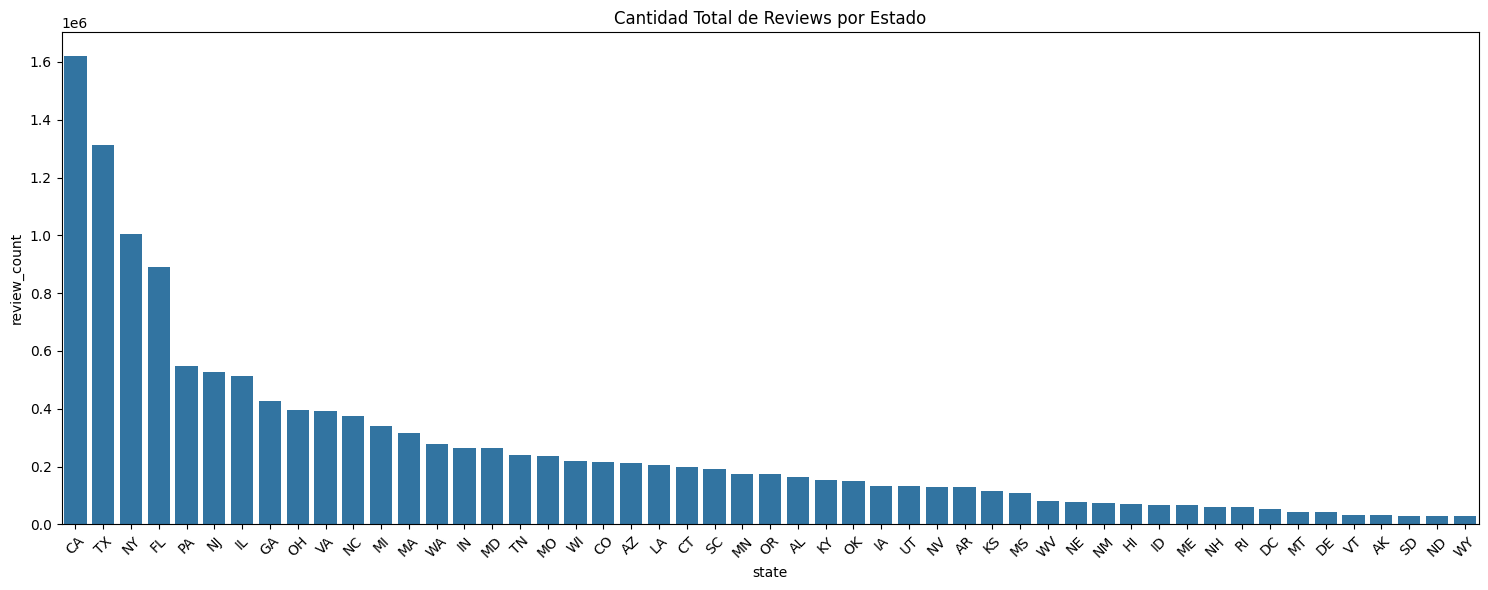

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_completo ya existe y tiene 'state' y 'review_count'

# 1. Sumar la cantidad de reviews por estado
reviews_by_state = df_completo.groupby('state', as_index=False)['review_count'].sum()

# Ordenar los estados por número de reviews para una mejor visualización
reviews_by_state = reviews_by_state.sort_values('review_count', ascending=False)

# 2. Graficar total de reviews por estado (barplot)
plt.figure(figsize=(15, 6))
sns.barplot(x='state', y='review_count', data=reviews_by_state)
plt.title('Cantidad Total de Reviews por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este gráfico podemos ver la cantidad de reviews por estado y se nota como hay una gran diferencia entre los mismos.

Se podría considerar prudente para una primera instancia del proyecto, trabajar con aquellos estados más ricos en datos para obtener un producto de mayor calidad.

C:\Users\User\AppData\Local\Temp\ipykernel_3240\787254107.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='review_count', data=reviews_by_region, palette='Accent')


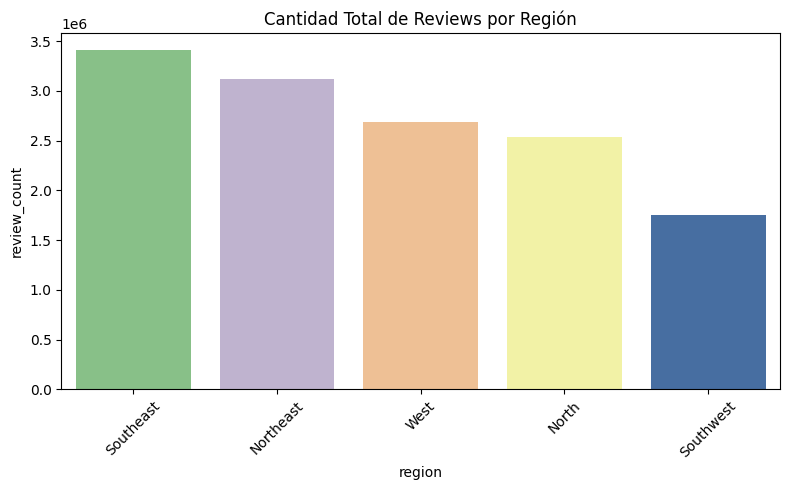

In [5]:
# 3. Definir el mapeo de estados a las 5 regiones
west_states = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "CO"]          # West
southwest_states = ["AZ", "NM", "TX", "OK"]                                  # Southwest
north_states = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]  # North
northeast_states = ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "PA", "NJ", "DE", "MD"]    # Northeast
southeast_states = ["FL", "GA", "SC", "NC", "TN", "KY", "WV", "VA", "DC", "AL", "MS", "AR", "LA"] # Southeast

state_to_region = {}

for s in west_states:
    state_to_region[s] = "West"
for s in southwest_states:
    state_to_region[s] = "Southwest"
for s in north_states:
    state_to_region[s] = "North"
for s in northeast_states:
    state_to_region[s] = "Northeast"
for s in southeast_states:
    state_to_region[s] = "Southeast"

# Añadir la columna región
reviews_by_state['region'] = reviews_by_state['state'].map(state_to_region)

# Eliminar cualquier estado que no se haya mapeado
reviews_by_state = reviews_by_state.dropna(subset=['region'])

# 4. Sumar reviews por región
reviews_by_region = reviews_by_state.groupby('region', as_index=False)['review_count'].sum()
reviews_by_region = reviews_by_region.sort_values('review_count', ascending=False)

# 5. Graficar por región
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='review_count', data=reviews_by_region, palette='Accent')
plt.title('Cantidad Total de Reviews por Región')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Para no tomar estados tan dispersos dentro del mapa de los Estados Unidos, evaluamos nombrar los estados más relevantes de las regiones con mayor número de reviews, en este caso la Southeast y la Northeast.

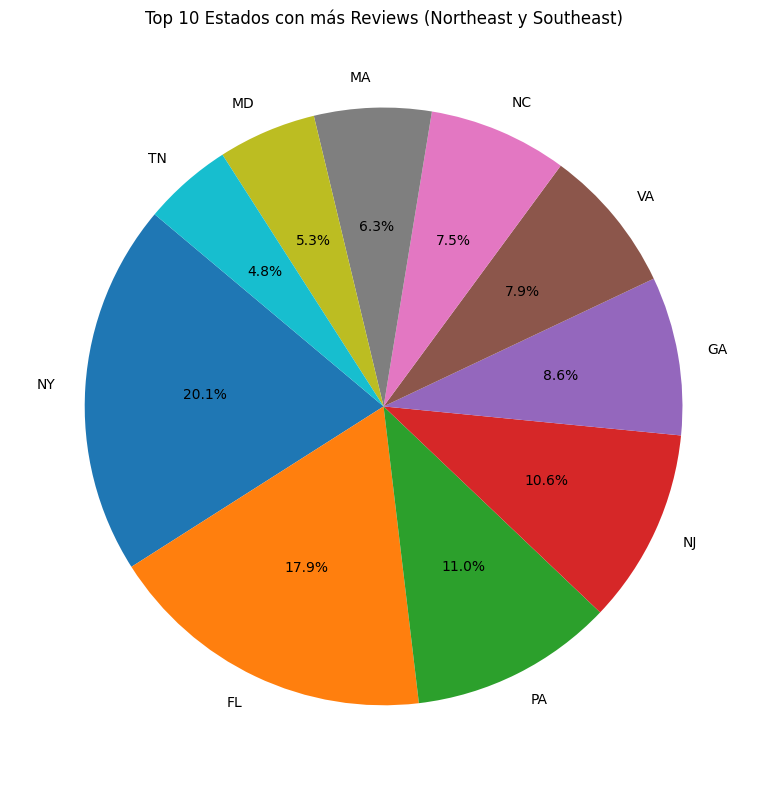

In [19]:
# 1. Filtrar sólo Northeast y Southeast
reviews_by_state = df_completo.groupby('state', as_index=False)['review_count'].sum()

reviews_by_state['region'] = reviews_by_state['state'].map(state_to_region)

df_ne_se = reviews_by_state[reviews_by_state['region'].isin(['Northeast', 'Southeast'])]

# 3. Ordenar por numero de reviews y tomar los 10 con más reviews
top_10_states = df_ne_se.sort_values('review_count', ascending=False).head(10)

# 4. Crear un gráfico de pastel con estos 10 estados
plt.figure(figsize=(8,8))
plt.pie(top_10_states['review_count'], labels=top_10_states['state'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Estados con más Reviews (Northeast y Southeast)')
plt.tight_layout()
plt.show()


Aquí podemos ver los 10 estados con mayor densidad de reviews de la región este y su porcentaje con respecto a la muestra total.
Tomaremos estos estados como primera muestra para desarrollar nuestra primera versión.

In [20]:
# Filtrar solo los estados del top_10_states
df_filtered = df_completo[df_completo['state'].isin(top_10_states['state'])]

# Guardar el DataFrame filtrado en un nuevo Parquet
output_parquet_path = "../Data_cleaned/metadatosgoogle/filtered_top_10_states.parquet"
df_filtered.to_parquet(output_parquet_path, index=False)

print(f"Archivo Parquet creado: {output_parquet_path}")

Archivo Parquet creado: ../Data_cleaned/metadatosgoogle/filtered_top_10_states.parquet


In [21]:
df_completo = pd.read_parquet('../Data_cleaned/metadatosgoogle/filtered_top_10_states.parquet')

In [22]:
df_completo.head(3)

,gmap_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours
0,0x89c6c89efcaed69d:0xded973f6033e7dba,Vivi Bubble Tea,701 S 5th St,Philadelphia,PA,19147,39.940293,-75.150923,4.0,8,[Restaurant],None
1,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Cape Seafood Shack,603 Del Prado Blvd S,Cape Coral,FL,33990,26.641377,-81.940545,5.0,1,[Restaurant],None
2,0x88c2e4e34f1ed783:0x76c5da381c499d79,Fresh Point Country Buffet,10525 US-19,Pinellas Park,FL,33782,27.867489,-82.702971,5.0,2,[Buffet restaurant],"[[Thursday, 11AM–9PM], [Friday, 11AM–9PM], [Sa..."


In [26]:
print(df_completo.shape)
df_completo.isnull().sum()

(72351, 12)


gmap_id            0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
categories         0
hours           7290
dtype: int64

Al parecer hay alrededor de un 10% de restaurantes que no proporcionan información sobre su horario. Hay que evaluar cómo manejar estos datos faltantes. 
A la hora de evaluar un restaurante, habría que tener en cuenta el hecho de que no brinde este tipo de información valiosa para el usuario.

In [27]:
num_duplicados = df_completo.duplicated(subset='gmap_id').sum()
print(f"Número de gmap_id duplicados: {num_duplicados}")

Número de gmap_id duplicados: 367


Hay que evaluar pq hay gmap_id duplicados cuando deberia ser un valor unico y hacer algo al respecto.

In [29]:
df_completo[df_completo.duplicated(subset='gmap_id', keep=False)].sort_values(by='gmap_id').head(10)

,gmap_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours
74,0x146c6711a70d7991:0xe478335f760c8ccc,Bar 91,400 Ave of the Champions,Palm Beach Gardens,FL,33418,26.828991,-80.141201,3.9,8,"[Bar & grill, Bar, Restaurant, Sports bar]","[[Wednesday, 6:30AM–9PM], [Thursday, 6:30AM–9P..."
441,0x146c6711a70d7991:0xe478335f760c8ccc,Bar 91,400 Ave of the Champions,Palm Beach Gardens,FL,33418,26.828991,-80.141201,3.9,8,"[Bar & grill, Bar, Restaurant, Sports bar]","[[Wednesday, 6:30AM–9PM], [Thursday, 6:30AM–9P..."
433,0x4ccab4b3af9c7c85:0x9defa19fe4e295c,Alpine Pizza,1104 U.S. 9,Schroon Lake,NY,12870,43.837433,-73.761254,4.3,45,[Pizza restaurant],"[[Wednesday, 4–9PM], [Thursday, 4–9PM], [Frida..."
66,0x4ccab4b3af9c7c85:0x9defa19fe4e295c,Alpine Pizza,1104 U.S. 9,Schroon Lake,NY,12870,43.837433,-73.761254,4.3,45,[Pizza restaurant],"[[Wednesday, 4–9PM], [Thursday, 4–9PM], [Frida..."
557,0x4ccd1ca666ff349b:0x3126349d5314b2ed,Black Lake Cafe,3371 County Rte 6,Hammond,NY,13646,44.523661,-75.591859,5.0,1,[American restaurant],None
190,0x4ccd1ca666ff349b:0x3126349d5314b2ed,Black Lake Cafe,3371 County Rte 6,Hammond,NY,13646,44.523661,-75.591859,5.0,1,[American restaurant],None
714,0x51325acc69cdd725:0xd9eab3bc5db69212,Lin's Asian Bistro,1075 Oakleaf Plantation Pkwy #305,Orange Park,FL,32065,30.161388,-81.835169,3.7,18,"[Chinese restaurant, Asian restaurant, Sushi r...","[[Tuesday, Closed], [Wednesday, 11AM–10PM], [T..."
347,0x51325acc69cdd725:0xd9eab3bc5db69212,Lin's Asian Bistro,1075 Oakleaf Plantation Pkwy #305,Orange Park,FL,32065,30.161388,-81.835169,3.7,18,"[Chinese restaurant, Asian restaurant, Sushi r...","[[Tuesday, Closed], [Wednesday, 11AM–10PM], [T..."
636,0x54ab5f4c1d29f075:0x60979db2ca1a5126,Nrgize,145 E Service Rd,Staten Island,NY,10314,40.588024,-74.191520,3.2,5,"[Juice shop, Breakfast restaurant, Cafe, Healt...","[[Wednesday, 8:30AM–10PM], [Thursday, 8:30AM–1..."
269,0x54ab5f4c1d29f075:0x60979db2ca1a5126,Nrgize,145 E Service Rd,Staten Island,NY,10314,40.588024,-74.191520,3.2,5,"[Juice shop, Breakfast restaurant, Cafe, Healt...","[[Wednesday, 8:30AM–10PM], [Thursday, 8:30AM–1..."


Parecen ser los mismos restaurantes que están dos veces ya que tienen la misma ubicación y el resto de los datos también coinciden, por lo que nos quedamos solo con uno de estos dos.

In [30]:
df_completo = df_completo.drop_duplicates(subset='gmap_id', keep='first')

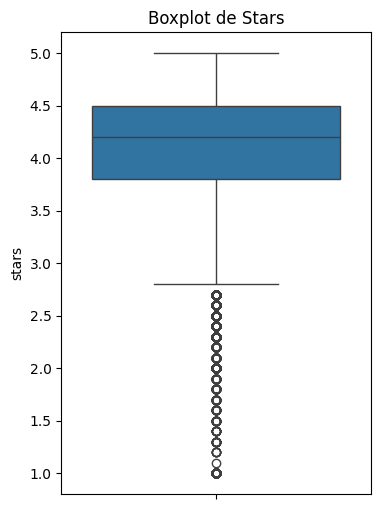

In [33]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df_completo['stars'])
plt.title('Boxplot de Stars')
plt.show()

El boxplot muestra que la mayoría de las calificaciones (stars) están concentradas entre aproximadamente 4.0 y 4.4 (caja), indicando una tendencia hacia puntuaciones altas. La mediana ronda el 4.0, reflejando que la mitad de los restaurantes tiene una puntuación igual o superior a este valor. Existe un grupo notable de valores más bajos (por debajo de 3.0) considerados como atípicos u outliers, pero en general, las reseñas tienden a ser positivas.

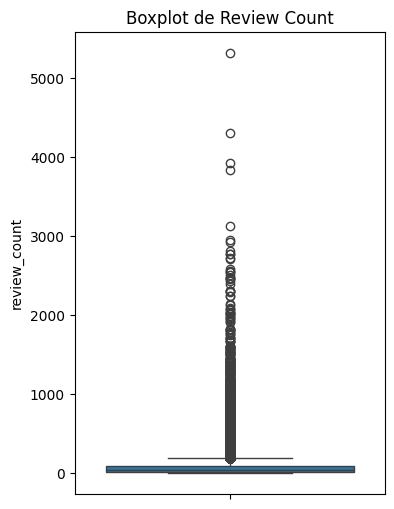

In [34]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df_completo['review_count'])
plt.title('Boxplot de Review Count')
plt.show()

In [35]:
num_reviews_0 = df_completo[df_completo['review_count'] == 0].shape[0]
print(f"Número de restaurantes con 0 reviews: {num_reviews_0}")

Número de restaurantes con 0 reviews: 0


Si bien no hay restorantes con 0 reviews, las reseñas están fuertemente concentradas cerca de valores muy bajos, con unos pocos restaurantes acumulando una enorme cantidad de reviews, generando numerosos outliers muy por encima de la mayoría.

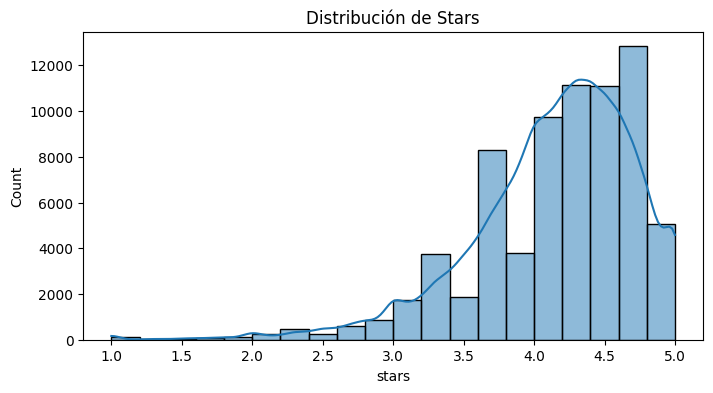

In [36]:
plt.figure(figsize=(8,4))
sns.histplot(df_completo['stars'], kde=True, bins=20)
plt.title('Distribución de Stars')
plt.show()

La distribución de las calificaciones está fuertemente sesgada hacia valores altos (entre 4.0 y 4.5), con pocos restaurantes con ratings muy bajos. Esto sugiere que la mayoría de los locales reciben evaluaciones mayormente positivas.

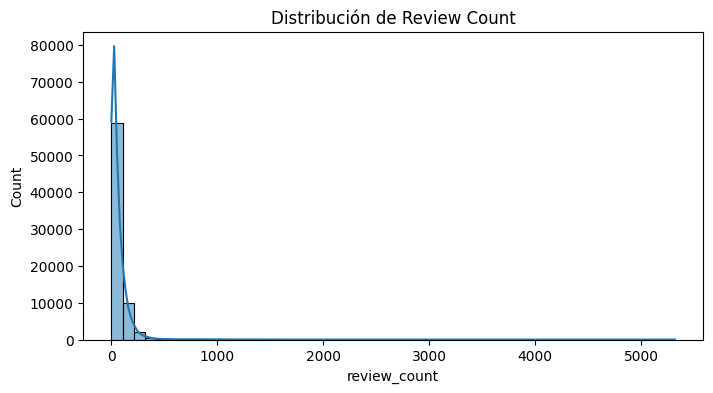

In [37]:
plt.figure(figsize=(8,4))
sns.histplot(df_completo['review_count'], kde=True, bins=50)
plt.title('Distribución de Review Count')
plt.show()

La mayoría de los restaurantes tienen muy pocas reseñas, mientras que unos pocos acumulan cantidades excepcionalmente altas, generando una distribución fuertemente sesgada hacia la izquierda con una larga cola a la derecha.

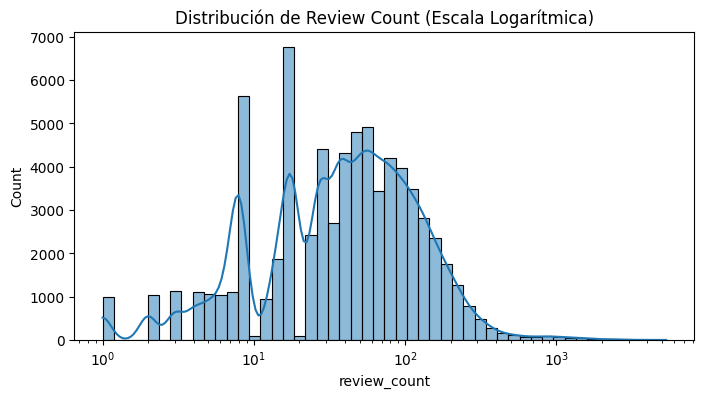

In [38]:
plt.figure(figsize=(8,4))
sns.histplot(df_completo['review_count'].apply(lambda x: x if x>0 else None), kde=True, log_scale=True, bins=50)
plt.title('Distribución de Review Count (Escala Logarítmica)')
plt.show()


Al representar la cantidad de reseñas en escala logarítmica se aprecia mejor la dispersión: la mayoría de los restaurantes acumulan entre 1 y 100 reseñas, con una distribución más uniforme al visualizar en log, y aún algunos con cantidades mucho mayores (más de 1000), evidenciando una concentración significativa en rangos bajos pero con una amplia variedad.